# CS 506 Spring 2021 - HW3
## Social Networks and Recommendataion Systems
#### Total: 25 Points

##### Package Limitations: None

### Name: Kaiyan Xu
### BU ID: U73265566
### BU Email: stevenhh@bu.edu
#### People you worked with on this hw:

### 1. Background

In this homework, you will try to recommend new collaborations to researchers of the Machine Learning community. Our approach will follow the guidelines of collaborative filtering: “**If your past behavior/preferences were similar to some other user’s, your future behavior may be as well**”. As an example, imagine you like Rolling Stones, Beatles and Jimmy Hendrix. It turns out that most people that like the aforementioned artists, are also fans of Eric Clapton. Then, it is very likely that if you listen to Eric Clapton’s music, you will like it as well.

In this assignment you will implement a **collaborative filtering recommendation system** for suggesting new collaborations to Machine Learning researchers.

**A network as a graph**: A graph or network represents relationships among different entities (users of a social network, researchers, products, etc.). Those entities are represented as nodes and the relationships between them (friends on Facebook, co-authors of a research paper, products purchased together) as edges. When there is an edge between two nodes, x and y, we say that y is a neighbor (or friend) of x (and also - as the graphs we consider are undirected - x is also a neighbor of y).

**Representing a graph in Python**: A widely used library in Python, for representing graphs is [NetworkX](https://networkx.github.io/documentation/stable/). You can read the documentation for more information on how to use this library.

### 2. Recommend new collaborations - The ML Community case 

In order to provide new collaborations and test the efficiency of the methods used, you are given two files (you can find them on piazza):

- ”old edges.txt”: In this file, every line contains the names of two re- searchers that have co-authored a paper in one of the top Machine Learn- ing conferences (NeurIPS, ICLR, ICML) between 2010 and 2016.
- ”new edges.txt”: In this file, every line contains the names of two re- searchers (from those existing in the above file) that formed a new (non- existing before) collaboration, in either 2017 and 2018.

With the first file in hand, you will answer the following question:
“For author X, list some non-collaborators in order, starting with the best col- laborator recommendation and ending with the worst”. A non-friend is a user who is not X and is not a collaborator of X. Depending on the recommendation algorithm you are going to choose, the list may include all non-collaborators or some of them.

Then, using the second file, with actual new collaborations formed in the next 3 years, you will test the efficiency of these algorithms.


### Tasks
a) [3 pts.] Write a function that reads the file “old edges.txt” and create a graph using NetworkX. (This is a tab-separated value (TSV) file, you may use packages such as Pandas to read it. )


In [1]:
# You can add functions, inputs outputs to existing functions. 
# Please do NOT change name of the existing functions

from typing import Tuple, List, Dict, Callable
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

def read_old_edges(file_path):
    """
    read old edges text file and return a NetworkX graph
    
    :param file_path: string file path to old_edges.txt
    :return: network graph instance of the graph
    """
    G = nx.Graph()
    # reference https://stackoverflow.com/questions/41107294/reading-text-file-of-graph-data-using-networkx
    G = nx.read_edgelist(file_path, delimiter = '\t', nodetype = str)
    figure(figsize=(10, 10))
    nx.draw(G, with_labels=False, node_size = 10)
    plt.show()
    return G

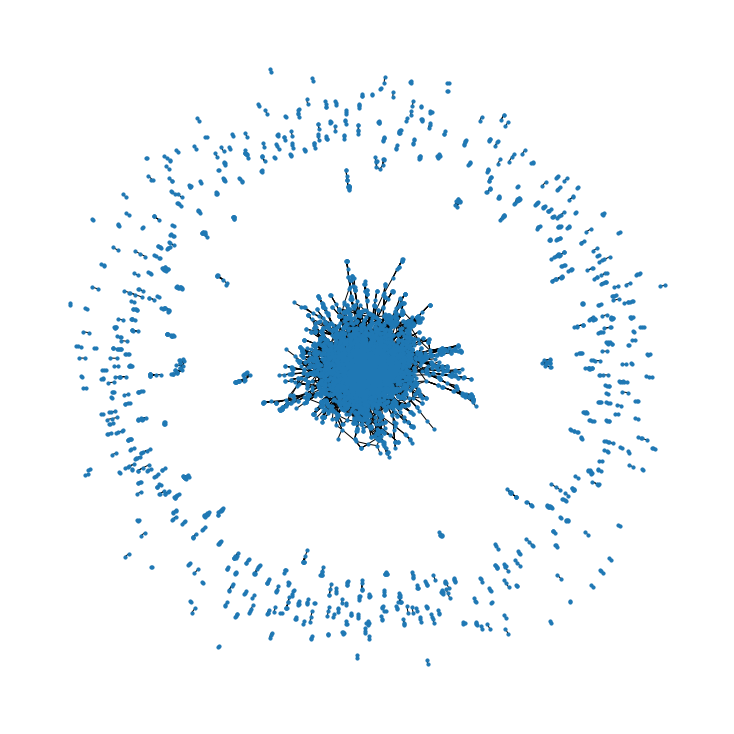

In [2]:
G = read_old_edges("old_edges.txt")

b) [3 pts.] Write a function that reads the file “new edges.txt” and for each author, keeps track of the new collaborations this user formed during 2017-2018.


In [3]:
def read_new_edges(file_path):
    """
    read new edges text file
    
    :param file_path: string file path to new_edges.txt
    :return: network graph instance of the graph and a dictionary listing authors and their neighbors
    """
    G = nx.Graph()
    G = nx.read_edgelist(file_path, delimiter='\t', nodetype=str)
    neighbor_dictionary = {}
    for node in G.nodes():
        neighbors = G.neighbors(node)
        neighbor_dictionary[node] = list(neighbors)
    figure(figsize=(10, 10))
    nx.draw(G, with_labels=False, node_size = 10)
    plt.show()
    return G, neighbor_dictionary

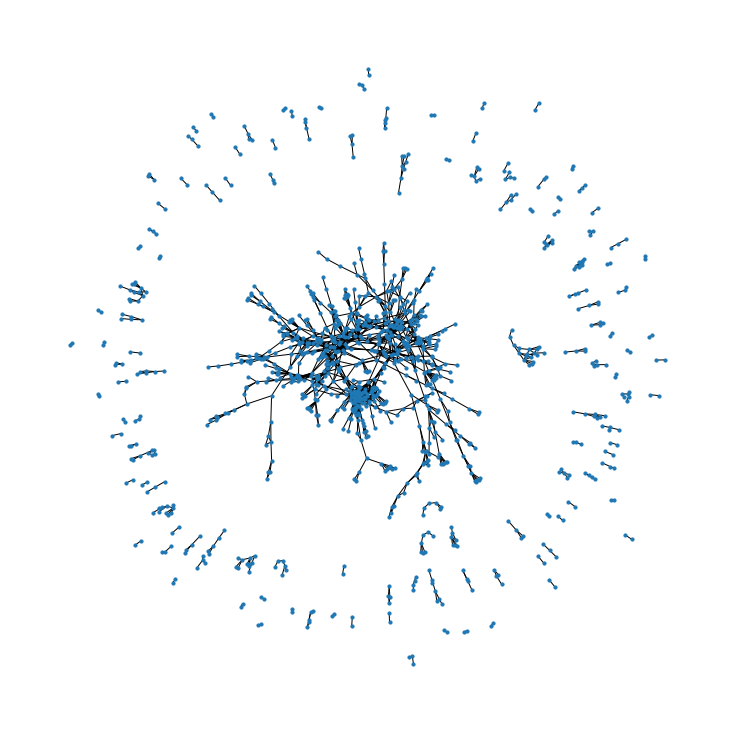

In [4]:
G_new, neighbor_dictionary = read_new_edges("new_edges.txt")

In 2017 and 2018, there were 1,757 new edges formed between existing authors. For the next tasks, pick (and recommend new collaborations for) those authors that formed at least 10 new connections between 2017-2018. In the remaining, when we talk about author X, we refer to one of those authors.

c) [5 pts.] **Recommend by number of common friends**

The intuition behind this recommendation algorithm is that if non-friend Y is your friend’s friend, then maybe Y should be your friend too. If person Y is the friend of many of your friends, then Y is an even better recommendation. 

In [5]:
from collections import Counter

def common_friends_number(graph, author):
    """
    Return list of authors who have a common neighbor as 
    given author sorted by number of common friends. 
    
    :param graph: collaboration graph in nextworkX; author: person we target to find the neighbors
    :return: list of recommended collaborators' name to recommend
    """
    friend = []
    neighbor = list(graph.neighbors(author))

    for i in neighbor:
        for j in graph.neighbors(i):
            if (j != author and j not in neighbor):
                friend.append(j)

    # sorted by number of occurrence and drop duplicates
    # If more than one neighbor has j, it means more common neighbor between j and author.
    sorted_neighbor = [key for key, value in Counter(friend).most_common()]
    return sorted_neighbor

In [15]:
common_friends_number(G, 'Yujia Li')

['Alexander G. Schwing',
 'Ruslan Salakhutdinov',
 'Ryan Kiros',
 'James Martens',
 'Brendan J. Frey',
 'Cynthia Dwork',
 'Daniel Tarlow',
 'Ilya Sutskever',
 'Jasper Snoek',
 'Laurent Charlin',
 'Ryan P. Adams',
 'Ryan Prescott Adams',
 'Toniann Pitassi',
 'Yu Wu',
 'Antonio Torralba 0001',
 'Renjie Liao',
 'Sanja Fidler',
 'Yang Song',
 'Yukun Zhu',
 'Benjamin M. Marlin',
 'David Buchman',
 "Marc'Aurelio Ranzato",
 'Md. Mostofa Ali Patwary',
 'Nadathur Satish',
 'Nando de Freitas',
 'Narayanan Sundaram',
 'Prabhat',
 'Oren Rippel',
 'Alan L. Yuille',
 'Andreas Geiger',
 'Andrew G. Berneshawi',
 'Angela Yao',
 'Christian Wojek',
 'David A. McAllester',
 'Gregory Shakhnarovich',
 'Huimin Ma',
 'Jian Peng 0001',
 'Jian Zhang',
 'Juergen Gall',
 'Kaustav Kundu',
 'Liang-Chieh Chen',
 'Luc J. Van Gool',
 'Marc Pollefeys',
 'Mathieu Salzmann',
 'Shenlong Wang',
 'Sven J. Dickinson',
 'Taehwan Kim 0003',
 'Tamir Hazan',
 'Xiaozhi Chen',
 'Aaron C. Courville',
 'Arkadev Chattopadhyay',
 'Jim

d) [5 pts.] **Make recommendations using Jaccard’s Index**

If Γ(X) is the set of neighbors of X, then the metric we used in part (c), assigns to a non-friend y, the following recommendation score (with respect to X): score(y) = |Γ(X)∩Γ(y)|. Jaccard’s Index scales this score by taking into account the union of X and Y ’s neighbors. Intuitively, X and Y are more similar, if what they have in common is as close as possible to what they have together.


In [7]:
def jaccard_similarity(list1, list2):
    """
    param list1/list2: two lists of neighbors
    return jaccard similarity of list 1 and list 2
    """
    intersection = len(list(set(list1).intersection(list2)))
    union = (len(set(list1)) + len(set(list2))) - intersection
    return float(intersection) / union

def jaccard_index(graph, author):
    """
    Return list of authors who have a common neighbor as 
    given author sorted by Jaccard Index (see pdf for equation) 
    
    :param graph: collaboration graph in nextworkX; author: person we target to find the neighbors
    :return: list of recommended collaborators' name to recommend
    """
    friend = []
    neighbor = list(graph.neighbors(author))
    jaccard = []
    
    for i in neighbor:
        for j in graph.neighbors(i):
            if (j != author and j not in neighbor):
                friend.append(j)
    friend_uni = list(set(friend))
    
    for friend in friend_uni:
        friend_D = list(graph.neighbors(friend))
        jaccard_score = jaccard_similarity(neighbor, friend_D)
        jaccard.append((jaccard_score,friend))
    jaccard_sort = sorted(jaccard, reverse = True)
    jaccard_name = []
    for sort_combine in jaccard_sort:
        name = sort_combine[1]
        jaccard_name.append(name)
    return jaccard_name

In [8]:
jaccard_index(G, 'Yujia Li')

['Yu Wu',
 'Maksims Volkovs',
 'Yang Song',
 'Renjie Liao',
 'Laurent Charlin',
 'Taehwan Kim 0003',
 'Sven J. Dickinson',
 'Mengye Ren',
 'James Martens',
 'Gregory Shakhnarovich',
 'Cynthia Dwork',
 'Christian Wojek',
 'Andreas Geiger',
 'Alexander G. Schwing',
 'Yukun Zhu',
 'Toniann Pitassi',
 'Shenlong Wang',
 'Liang-Chieh Chen',
 'Juergen Gall',
 'Jian Peng 0001',
 'Arkadev Chattopadhyay',
 'Angela Yao',
 'Jasper Snoek',
 'Sanja Fidler',
 'David Buchman',
 'Craig Boutilier',
 'Brendan J. Frey',
 'Ryan Prescott Adams',
 'Ryan Kiros',
 'Xiaozhi Chen',
 'Marc Pollefeys',
 'Kaustav Kundu',
 'Jian Zhang',
 'Huimin Ma',
 'Andrew G. Berneshawi',
 'Kelvin Xu',
 'Daniel Tarlow',
 'Narayanan Sundaram',
 'Nadathur Satish',
 'Md. Mostofa Ali Patwary',
 'Mathieu Salzmann',
 'Oren Rippel',
 'David A. McAllester',
 'Antonio Torralba 0001',
 'Luc J. Van Gool',
 'Benjamin M. Marlin',
 'Jimmy Ba',
 'Prabhat',
 'Ruslan Salakhutdinov',
 'Ilya Sutskever',
 'Tamir Hazan',
 'Kyunghyun Cho',
 'Alan L. Y

e)  [5 pts.] **Make recommendations using Adamic/Adar Index**

For part (c), we made recommendations using common neighbors. However, when assigning a score to Y , instead of just taking a count of the number of common neighbors, we take a weighted sum of them, where the weight of each common neighbor of X and Y , call her Z, is the inverse of the logarithm of the number of Z’s neighbors. In that way, we value more common neighbors that are more selective.

In [9]:
import math

def adamic_adar_index(graph, author):
    """
    Return list of recommendations of a given author sorted 
    by Adamic / Adar Index (see pdf for equation) 
    
    :param graph: collaboration graph in nextworkX; author: person we target to find the neighbors
    :return: list of recommended collaborators' name to recommend
    """
    friend = []
    neighbor = list(graph.neighbors(author))
    
    for i in neighbor:
        for j in graph.neighbors(i):
            if (j != author and j not in neighbor):
                friend.append(j)
    
    friend_uni = list(set(friend))

    adamic_adar = []
    for friend_C in friend_uni:
        neighbor_C = list(graph.neighbors(friend_C))
        score_C = 0
        for friend_D in neighbor_C:
            if (friend_D in neighbor):
                length = len(list(graph.neighbors(friend_D)))
                adamic_adar_score = 1 / (math.log(length))
                score_C = score_C + adamic_adar_score
        adamic_adar.append((score_C, friend_C))
    
    adamic_adar_sort = sorted(adamic_adar, reverse = True)
    
    adamic_adar_name = []
    for sort_combine in adamic_adar_sort:
        name = sort_combine[1]
        adamic_adar_name.append(name)
    return adamic_adar_name

In [10]:
adamic_adar_index(G, 'Yujia Li')

['Alexander G. Schwing',
 'Ryan Kiros',
 'Ruslan Salakhutdinov',
 'Yu Wu',
 'Toniann Pitassi',
 'Ryan Prescott Adams',
 'Ryan P. Adams',
 'Laurent Charlin',
 'Jasper Snoek',
 'James Martens',
 'Ilya Sutskever',
 'Daniel Tarlow',
 'Cynthia Dwork',
 'Brendan J. Frey',
 'Yukun Zhu',
 'Yang Song',
 'Sanja Fidler',
 'Renjie Liao',
 'Antonio Torralba 0001',
 'Prabhat',
 'Oren Rippel',
 'Narayanan Sundaram',
 'Nando de Freitas',
 'Nadathur Satish',
 'Md. Mostofa Ali Patwary',
 "Marc'Aurelio Ranzato",
 'David Buchman',
 'Benjamin M. Marlin',
 'Yoshua Bengio',
 'Xiaozhi Chen',
 'Tamir Hazan',
 'Taehwan Kim 0003',
 'Sven J. Dickinson',
 'Shenlong Wang',
 'Mengye Ren',
 'Mathieu Salzmann',
 'Marc Pollefeys',
 'Maksims Volkovs',
 'Luc J. Van Gool',
 'Liang-Chieh Chen',
 'Kyunghyun Cho',
 'Kelvin Xu',
 'Kaustav Kundu',
 'Juergen Gall',
 'Jimmy Ba',
 'Jian Zhang',
 'Jian Peng 0001',
 'Huimin Ma',
 'Gregory Shakhnarovich',
 'David A. McAllester',
 'Craig Boutilier',
 'Christian Wojek',
 'Arkadev Chat

f) [4 pts.] **How good are the recommendations we make?** 

Previously, you implemented 3 functions, that given a user X provide recommendations for this user. In this task, you will check how good these recommendations are using the actual new connections formed during 2017-2018.

You will use two different ways, to calculate the efficiency of every approach:

- For each user X, take the 10 first recommendations for this user, and calculate the number of them that were actually formed during 2017-2018. You should report the average among users X.

- For each newly formed collaboration of user X, calculate the rank of this collaboration (the index where this new node Y appears in the recommendations list for X). Report the average among newly formed edges.

In [11]:
# get a list of names that appear in both old and new network graph instance
node_new = []
for node, degree in G_new.degree():
    # appear more than 10 times in new network graph instance
    if degree >= 10:
        node_new.append(node)
node_old = [node for (node, _) in G.degree()]
name = list(set(node_new).intersection(node_old))
print(name)
print(len(name))

['Adrià Puigdomènech Badia', 'Nal Kalchbrenner', 'Rémi Munos', 'Yujia Li', 'Peter Battaglia', 'Danilo Jimenez Rezende', 'Alexander Pritzel', 'Tom Schaul', 'Pushmeet Kohli', 'Percy Liang', 'Oriol Vinyals', 'Nicolas Heess', 'Miroslav Dudík', 'Demis Hassabis', 'Razvan Pascanu', 'Karen Simonyan', 'Jascha Sohl-Dickstein', 'Theophane Weber', 'Lihong Li 0001', 'Simon S. Du', 'Nando de Freitas', 'David Silver', 'Matthew Botvinick', 'Yutian Chen', 'Aarti Singh', 'Le Song', 'David P. Woodruff', 'Lars Buesing', 'Daan Wierstra', 'Adrian Weller', 'Aäron van den Oord', 'Aaron C. Courville', 'Peter L. Bartlett', 'Arthur Guez', 'David P. Reichert', 'Yee Whye Teh', 'Bo Dai', 'Mohammad Norouzi 0002', 'Alexandros G. Dimakis', 'Michael I. Jordan', 'Tim Lillicrap']
41


In [12]:
def top_k_recommendation_accuracy(graph, index_method, new_edges):
    """
    Among top k recommendations of every user, return average number 
    of recommendations that becomes reality
    
    :param graph: old collaboration graph in networkX
    :param index_method: function that is used to make recommendation
    :param new_edges: graph in networkX 2017-18
    :return: average accuracy of top 10 predicitons among users that 
    have more than 10 collabrators in 2017-2018
    """
    percent_count = []
    for i in name:
        predict = index_method(graph,i)[:10]
        actual = list(new_edges.neighbors(i))
        
        count = 0
        for predict_neighbor in predict:
            if predict_neighbor in actual:
                count += 1
        percent_count.append(count/10)
        
    return sum(percent_count)/len(percent_count)

print(f'accuracy of common friend approach: {top_k_recommendation_accuracy(G, common_friends_number, G_new)}')
print(f'accuracy of Jaccard Index approach: {top_k_recommendation_accuracy(G, jaccard_index, G_new)}')
print(f'accuracy of Adamic/Adar Index approach: {top_k_recommendation_accuracy(G, adamic_adar_index, G_new)}')

def new_collaboration_rank(graph, index_method, new_edges):
    """
    Among the new collaborations of every user, return average rank 
    of the collaboration calculated by the function
    
    :param graph: old collaboration graph in nextworkX
    :param index_method: function that is used to make recommendation
    :param new_edges: graph in networkX 2017-18
    :return: average ranking in old predictions among users that have 
    more than 10 collabrators in 2017-2018
    """
    rank = []
    for i in name:
        friends_predict = index_method(graph,i)
        friends_new = list(set(new_edges.neighbors(i)))
        
        for j in friends_new:
            if (j in friends_predict):
                rank.append(friends_predict.index(j))
            else:
                # rank = length if not in old recommendation list 
                # so it is 1 bigger than the last people recommended
                rank.append(len(friends_predict))
    rank_avg = sum(rank) / len(rank)
    return rank_avg

print(f'average rank of common friend approach: {new_collaboration_rank(G, common_friends_number, G_new)}')
print(f'average rank for Jaccard Index approach: {new_collaboration_rank(G, jaccard_index, G_new)}')
print(f'average rank for Adamic/Adar Index: {new_collaboration_rank(G, adamic_adar_index, G_new)}')

accuracy of common friend approach: 0.11463414634146342
accuracy of Jaccard Index approach: 0.07804878048780489
accuracy of Adamic/Adar Index approach: 0.1048780487804878
average rank of common friend approach: 81.97113752122242
average rank for Jaccard Index approach: 87.39728353140917
average rank for Adamic/Adar Index: 84.9490662139219


e) [**Bonus Question**] [2 pts.]
Doing some literature search, suggest your own algorithm for recommend- ing new links to a user X. Argue about the choice you make, why it makes sense to suggest users that way? How is the efficiency of this algorithm, compared to the ones you implemented in parts (c), (d) and (e)?

#### Using Cosine Similarity to measure the similarity of the author and the person recommended. It can used to determine how similar the two lists are irrespective of their size. If two lists are more similar, their vectors have smaller angle and similar direction, and measurement of cosine similarity is bigger.

In [13]:
import math

def cos_similarity(list1, list2):
    """
    return cosine similarity of list 1 and list 2
    """
    intersection = len(list(set(list1).intersection(list2)))
    return float(intersection) / math.sqrt(len(list1) * len(list2))

def cos_index(graph, author):
    """
    Return list of authors who have a common neighbor as 
    given author sorted by Jaccard Index
    
    :param graph: collaboration graph in nextworkX; author: person we target to find the neighbors
    :return: list of new collaborators' name to recommend
    """
    friend = []
    neighbor = list(graph.neighbors(author))
    cos = []
    
    for i in neighbor:
        for j in graph.neighbors(i):
            if (j != author and j not in neighbor):
                friend.append(j)
    friend_uni = list(set(friend))
    
    for friend in friend_uni:
        friend_D = list(graph.neighbors(friend))
        cos_score = cos_similarity(neighbor, friend_D)
        cos.append((cos_score,friend))
    cos_sort = sorted(cos, reverse = True)
    cos_name = []
    for sort_combine in cos_sort:
        name = sort_combine[1]
        cos_name.append(name)
    return cos_name

cos_index(G, 'Yujia Li')

['Yu Wu',
 'Maksims Volkovs',
 'Alexander G. Schwing',
 'Yang Song',
 'Renjie Liao',
 'Laurent Charlin',
 'Taehwan Kim 0003',
 'Sven J. Dickinson',
 'Mengye Ren',
 'James Martens',
 'Gregory Shakhnarovich',
 'Cynthia Dwork',
 'Christian Wojek',
 'Andreas Geiger',
 'Yukun Zhu',
 'Toniann Pitassi',
 'Jasper Snoek',
 'Ryan Kiros',
 'Shenlong Wang',
 'Sanja Fidler',
 'Liang-Chieh Chen',
 'Juergen Gall',
 'Jian Peng 0001',
 'Brendan J. Frey',
 'Arkadev Chattopadhyay',
 'Angela Yao',
 'Ryan Prescott Adams',
 'David Buchman',
 'Craig Boutilier',
 'Daniel Tarlow',
 'Antonio Torralba 0001',
 'Xiaozhi Chen',
 'Marc Pollefeys',
 'Kaustav Kundu',
 'Jian Zhang',
 'Huimin Ma',
 'Andrew G. Berneshawi',
 'Ruslan Salakhutdinov',
 'Kelvin Xu',
 'Narayanan Sundaram',
 'Nadathur Satish',
 'Md. Mostofa Ali Patwary',
 'Mathieu Salzmann',
 'Ilya Sutskever',
 'Oren Rippel',
 'David A. McAllester',
 'Ryan P. Adams',
 'Luc J. Van Gool',
 'Benjamin M. Marlin',
 'Jimmy Ba',
 'Prabhat',
 'Tamir Hazan',
 'Kyunghyun

In [14]:
print(f'accuracy of Sørensen–Dice coefficient approach: {top_k_recommendation_accuracy(G, cos_index, G_new)}')
print(f'average rank for Sørensen–Dice coefficient approach: {new_collaboration_rank(G, cos_index, G_new)}')

accuracy of Sørensen–Dice coefficient approach: 0.06829268292682929
average rank for Sørensen–Dice coefficient approach: 88.61460101867573


In this approcach, the accuracy is smaller than the three approach above and average rank is highest. Therefore, it is a less accurate index to measure the similarity between the author and person we consider as friend.